In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('data.csv')
data.head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5842 entries, 0 to 5841
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentence   5842 non-null   object
 1   Sentiment  5842 non-null   object
dtypes: object(2)
memory usage: 91.4+ KB


In [5]:
data.isnull().sum()

,0
Sentence,0
Sentiment,0


In [6]:
data.shape

(5842, 2)

In [7]:
data["Sentiment"].value_counts()

,count
Sentiment,
neutral,3130
positive,1852
negative,860


In [8]:
#removing html tags
import re
def remove_html(text):
    pattern = re.compile('<.*?>')
    return re.sub(pattern, '', text)

In [9]:
data["Sentence"] = data['Sentence'].apply(remove_html)

In [10]:
data.sample(3)

,Sentence,Sentiment
4013,The value of the order is nearly EUR400m .,neutral
28,The first installment of the Cinema Series con...,neutral
3580,The company will make its marketing and sales ...,positive


In [11]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [12]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

In [13]:
stopwords_set = set(stopwords.words('english'))
ps = PorterStemmer()

def preprocess(text):
    if isinstance(text, list):
        text = ' '.join(text)
    text = text.lower()
    text = word_tokenize(text)
    text = [word for word in text if word.isalnum()]
    text = [word for word in text if word not in stopwords_set]
    text = [ps.stem(word) for word in text]
    return " ".join(text)

preprocess("Hi! my name is Atif, and i've a strong interest in data science")

'hi name atif strong interest data scienc'

In [14]:
preprocess(data['Sentence'].iloc[0])  # Process the first sentence


'geosolut technolog leverag benefon gp solut provid locat base search technolog commun platform locat relev multimedia content new power commerci model'

In [15]:
data['Sentence'] = data['Sentence'].apply(preprocess)
data.sample(3)

,Sentence,Sentiment
1748,enp newswir 22 march 2011 releas date 21032011...,neutral
2538,valeant ceo pledg heed critic pain experi,negative
3131,compani said current french distribut unit rag...,neutral


In [16]:
import wordcloud
from wordcloud import WordCloud


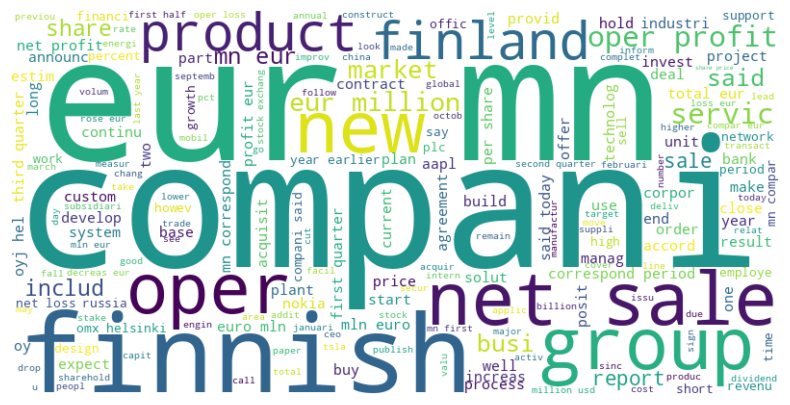

In [17]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(data['Sentence']))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [18]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Sentiment'] = le.fit_transform(data['Sentiment'])

In [27]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

 = CountVectorizer()
cv = TfidfVectorizer()

X_cv = cv.fit_transform(data['Sentence'])
X_tf = tf.fit_transform(data['Sentence'])

X_cv = pd.DataFrame(X_cv.toarray(), columns=cv.get_feature_names_out())
X_tf = pd.DataFrame(X_tf.toarray(), columns=tf.get_feature_names_out())

X_cv.head()
X_tf.head()

print(X_cv.shape)
print(X_tf.shape)



(5842, 7960)
(5842, 7960)


In [28]:
from sklearn.model_selection import train_test_split

X_cv_train, X_cv_test, y_cv_train, y_cv_test = train_test_split(X_cv, data['Sentiment'], test_size=0.2, random_state=42)

In [29]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [30]:
lr = LogisticRegression(C= 0.1, solver= 'saga')
mnb = MultinomialNB(alpha= 2.0)
gnb = GaussianNB(var_smoothing= 1e-09)
bnb = BernoulliNB(alpha= 0.5, binarize= 0.0)



In [31]:
model = [lr,mnb,gnb,bnb]

for m in model:
  m.fit(X_cv_train,y_cv_train)
  y_pred = m.predict(X_cv_test)
  print(f"Model: {m}")
  print(f"Accuracy: {accuracy_score(y_cv_test, y_pred)}")
  print(classification_report(y_cv_test, y_pred))



Model: LogisticRegression(C=0.1, solver='saga')
Accuracy: 0.6287425149700598
              precision    recall  f1-score   support

           0       0.50      0.01      0.01       175
           1       0.61      0.99      0.75       622
           2       0.79      0.32      0.45       372

    accuracy                           0.63      1169
   macro avg       0.63      0.44      0.41      1169
weighted avg       0.65      0.63      0.55      1169

Model: MultinomialNB(alpha=2.0)
Accuracy: 0.6313088109495295
              precision    recall  f1-score   support

           0       1.00      0.03      0.06       175
           1       0.61      0.99      0.76       622
           2       0.72      0.32      0.45       372

    accuracy                           0.63      1169
   macro avg       0.78      0.45      0.42      1169
weighted avg       0.71      0.63      0.55      1169

Model: GaussianNB()
Accuracy: 0.4636441402908469
              precision    recall  f1-score   suppo

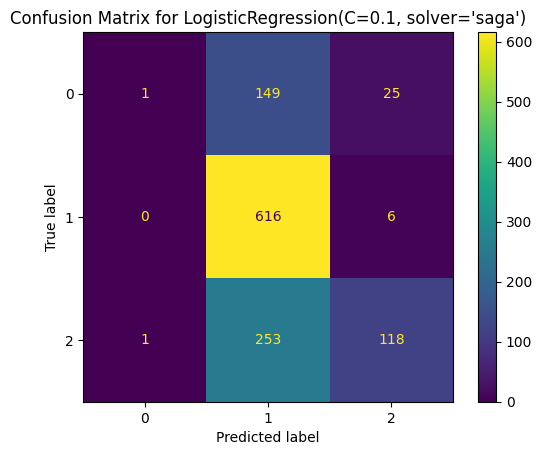

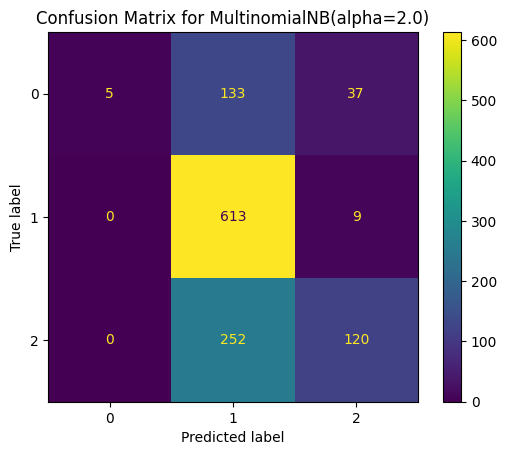

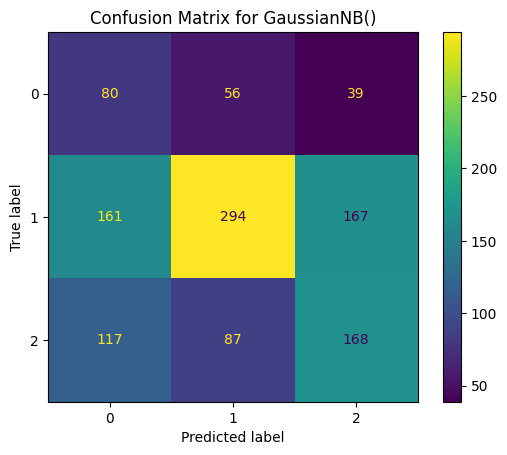

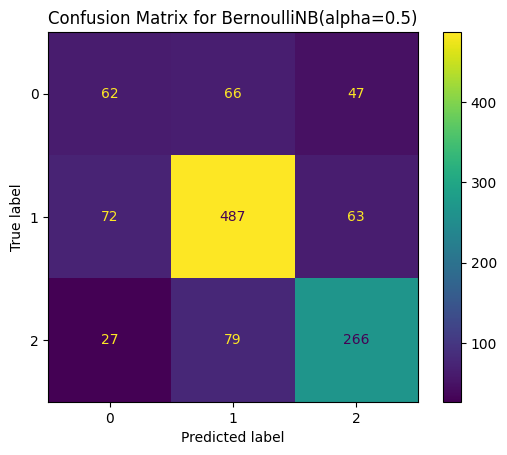

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

for m in model:
  ConfusionMatrixDisplay.from_estimator(m, X_cv_test, y_cv_test)
  plt.title(f'Confusion Matrix for {m}')
  plt.show()


In [33]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grids for each model

# Logistic Regression
param_grid_lr = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'saga']
}

# Multinomial Naive Bayes (NB)
param_grid_mnb = {
    'alpha': [0.1, 0.5, 1.0, 2.0]
}

# Gaussian Naive Bayes (NB) doesn't have many hyperparameters for tuning, but we can set priors
param_grid_gnb = {
    'var_smoothing': [1e-9, 1e-8, 1e-7]
}

# Bernoulli Naive Bayes (NB)
param_grid_bnb = {
    'alpha': [0.1, 0.5, 1.0],
    'binarize': [0.0, 0.1, 0.2]  # threshold for binarizing features
}

# Create a dictionary of models and their hyperparameter grids
models_param_grid = {
    'Logistic Regression': (LogisticRegression(), param_grid_lr),
    'Multinomial Naive Bayes': (MultinomialNB(), param_grid_mnb),
    'Gaussian Naive Bayes': (GaussianNB(), param_grid_gnb),
    'Bernoulli Naive Bayes': (BernoulliNB(), param_grid_bnb)
}

# Perform GridSearchCV for each model
best_params = {}
for model_name, (model, param_grid) in models_param_grid.items():
    print(f"Running GridSearchCV for {model_name}...")
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, verbose=1, n_jobs=-1)
    grid_search.fit(X_cv_train, y_cv_train)
    best_params[model_name] = grid_search.best_params_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")

# Print all best parameters for each model
print("\nBest parameters for all models:")
for model_name, params in best_params.items():
    print(f"{model_name}: {params}")


Running GridSearchCV for Logistic Regression...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters for Logistic Regression: {'C': 1, 'solver': 'saga'}
Running GridSearchCV for Multinomial Naive Bayes...
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameters for Multinomial Naive Bayes: {'alpha': 0.5}
Running GridSearchCV for Gaussian Naive Bayes...
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best parameters for Gaussian Naive Bayes: {'var_smoothing': 1e-08}
Running GridSearchCV for Bernoulli Naive Bayes...
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best parameters for Bernoulli Naive Bayes: {'alpha': 0.5, 'binarize': 0.0}

Best parameters for all models:
Logistic Regression: {'C': 1, 'solver': 'saga'}
Multinomial Naive Bayes: {'alpha': 0.5}
Gaussian Naive Bayes: {'var_smoothing': 1e-08}
Bernoulli Naive Bayes: {'alpha': 0.5, 'binarize': 0.0}
